<div style="text-align: center; background-color: #0A6EBD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
    FIT-HCMUS, VNU-HCM 
    <br>
    LẬP TRÌNH KHOA HỌC DỮ LIỆU 
    <br>
    Final project 📌
</div>

<div style="text-align: center; background-color: #5A96E3; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
 Question and modelling📌
</div>


# 0. Question

- Loans are really important because they help people buy homes, start businesses, or even medical emergency .Despite their importance, the loan approval process is often marred by time-consuming manual assessments, leading to occasional errors and delays. This issue becomes particularly critical when borrowers require funds promptly for time-sensitive ventures. 

**Question:** How can we predict one person's loan approval status with high accuracy and low time budget?

- Luckily, with the remarkable computation power of computers, we can solve the problem within seconds if only we have a good model that predicts precise outcomes.

# 1. Import relevant libraries and modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn import metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# 2. Preprocessing

In [2]:
raw_data = pd.read_csv("../data/processed_data.csv")
raw_data.head()

,Unnamed: 0,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


## Dropping unecessary columns

In [3]:
raw_data = raw_data.drop(['Unnamed: 0'],axis = 1)

In [4]:
raw_data.columns.values

array(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype=object)

In [5]:
raw_data.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


## Encoding for categorical columns' binary values

In [6]:
encoded_data = raw_data.copy()
cat_col = raw_data.select_dtypes(include = 'object').columns.values
num_col = raw_data.select_dtypes(exclude = 'object').columns.values

map_dict = {'education':{' Graduate':1,' Not Graduate':0},
            'self_employed':{' Yes': 1, ' No': 0},
             'loan_status':{' Approved':1,' Rejected':0}}

for col in cat_col:
    encoded_data[col] = encoded_data[col].map(map_dict[col])
encoded_data.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


## Declare inputs and targets

In [7]:
x = encoded_data.drop(['loan_status'], axis = 1)
y = encoded_data['loan_status']

## Splitting train, test set

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [9]:
print(f"Train data shape: inputs {x_train.shape} and targets {y_train.shape}")
print(f"Test data shape: inputs {x_test.shape} and targets {y_test.shape}")

Train data shape: inputs (3415, 11) and targets (3415,)
Test data shape: inputs (854, 11) and targets (854,)


# 3. Logistic Regression model

**Note:** Modeling process will be done parallely with checking for some important logistic regression assumptions.

### Assumption 1 : Appropriate Outcome Type

- Logistic regression generally works as a classifier, so the type of logistic regression utilized (binary, multinomial, or ordinal) must match the outcome (dependent) variable in the dataset.
- By default, logistic regression assumes that the outcome variable is binary, where the number of outcomes is two (e.g., Yes/No).
- If the dependent variable has three or more outcomes, then multinomial or ordinal logistic regression should be used.

**How to Check?**

- We can check this assumption by getting the number of different outcomes in the dependent variable. If we want to use binary logistic regression, then there should only be two unique outcomes in the outcome variable.
- **However, when exploring data, loan_approval column is only seen with two values, so there is no need to further investigate**

### Assumption 2 — Linearity of independent variables and log-odds

- One of the critical assumptions of logistic regression is that the relationship between the logit (aka log-odds) of the outcome and each continuous independent variable is linear.

- The logit is the logarithm of the odds ratio, where p = probability of a positive outcome 

logit(p) = log(p/1-p)

**How to Check?**

**Visual check**

- We can check logit linearity is by visually inspecting the scatter plot between each predictor and the logit values.
- But first, we need to train a model to actually do this

### 3.1 Modeling

Optimization terminated successfully.
         Current function value: 0.218363
         Iterations 8


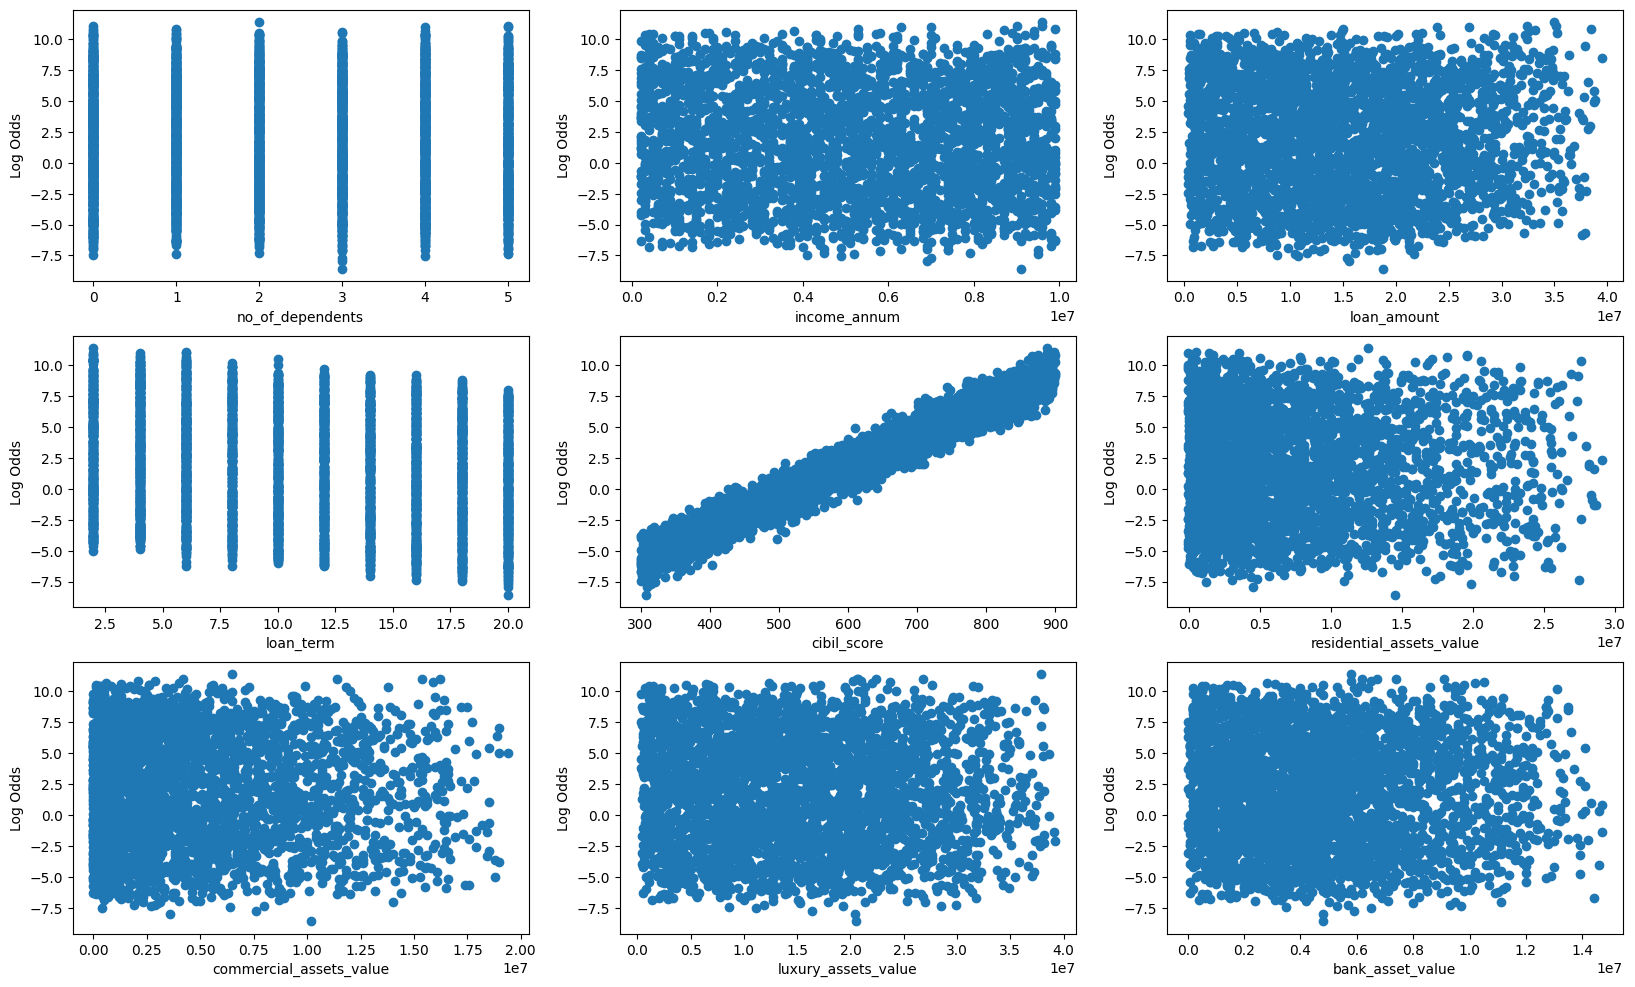

In [10]:
X_train = sm.add_constant(x_train)

model1 = sm.Logit(y_train, X_train).fit()

predicted = model1.predict(X_train)
log_odds = np.log(predicted / (1 - predicted))

fig,axes = plt.subplots(3,3,figsize= (20,12))
ax = axes.flatten()
for i,col in enumerate(num_col):
    ax[i].scatter(x_train[col], log_odds)
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('Log Odds')

**Observation:** Most of features show linearity with respect to log odds. In fact, some of them are partially linearity, some have a significant variance ( or standard errors ). Noticably, cibil_score showed a remarkable linear relationship with log odds.

**At this point**, we have a model that passed assumption 2 which is the most important. Therefore, we should see how the model learn on the train dataset to decide whether to test its accuracy on the test dataset.

**Confusion matrix and summary**

In [11]:
preds = model1.predict(X_train)
threshold = 0.5
preds = preds.apply(lambda x : 0 if x < threshold else 1)

confmat = np.array(confusion_matrix(y_train, preds))
confusion = pd.DataFrame(confmat, index=['approved', 'not_approved'],
columns=['predicted_approved', 'predicted_not_approved'])
accuracy = (confusion.loc['approved', 'predicted_approved'] + confusion.loc['not_approved', 'predicted_not_approved']) / confmat.sum()
print(f"Accuracy: {accuracy:.4f}")
confusion

Accuracy: 0.9209


,predicted_approved,predicted_not_approved
approved,1160,135
not_approved,135,1985


**Good prediction on the train dataset, however, we do not want to jump to final step yet.**

In [12]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            loan_status   No. Observations:                 3415
Model:                          Logit   Df Residuals:                     3403
Method:                           MLE   Df Model:                           11
Date:                Sat, 23 Dec 2023   Pseudo R-squ.:                  0.6710
Time:                        02:12:27   Log-Likelihood:                -745.71
converged:                       True   LL-Null:                       -2266.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      -11.4829      0.494    -23.259      0.000     -12.451     -10.515
no_of_dependents            -0.0172      0.039     -0.441      0.659      -0.094       0.059
education                    0.0483      0.133      0.364      0.716      -0.212       0.309
self_employed                0.1335      0.133      1.006      0.315      -0.127       0.394
income_annum             -6.568e-07   1.03e-07     -6.396      0.000   -8.58e-07   -4.56e-07
loan_amount               1.538e-07   2.07e-08      7.441      0.000    1.13e-07    1.94e-07
loan_term                   -0.1568      0.013    -12.187      0.000      -0.182      -0.132
cibil_score                  0.0250      0.001     26.511      0.000       0.023       0.027
residential_assets_value  6.545e-09   1.32e-08      0.495      0.620   -1.94e-08    3.24e-08
commercial_assets_value   2.068e-08   1.94e-08      1.065      0.287   -1.74e-08    5.87e-08
luxury_assets_value       3.732e-08   1.93e-08      1.936      0.053   -4.72e-10    7.51e-08
bank_asset_value          4.372e-08   3.73e-08      1.172      0.241   -2.94e-08    1.17e-07
============================================================================================
"""

- Only income_annum, loan_amount, loan_term, cibil_score  are significant to the model.
- Feature selectiing on those variables may yield a better result.
- Moreover, many type of assets value standing alone do not contribute to model. However, assets must play an important role when come to loan. Hopefully, when sum these columns up, we could get a meaningful feature.

### 3.2 Modeling with feature selection

**Feature selection**

In [13]:
selected_features = ['income_annum', 'loan_amount', 'loan_term', 'cibil_score','Total_assets']

x_train_copy = x_train.copy()
x_test_copy = x_test.copy()

x_train_copy['Total_assets'] = x_train_copy['residential_assets_value'] + x_train_copy['commercial_assets_value'] + x_train_copy['luxury_assets_value'] + x_train_copy['bank_asset_value']
x_test_copy['Total_assets'] = x_test_copy['residential_assets_value'] + x_test_copy['commercial_assets_value'] + x_test_copy['luxury_assets_value'] + x_test_copy['bank_asset_value']

x_train_selected = x_train_copy[selected_features]
x_test_selected = x_test_copy[selected_features]

X_train_selected = sm.add_constant(x_train_selected)

### Assumption 3 : No multicollinearity

Multicollinearity corresponds to a situation where the data contain highly correlated independent variables.
This is a problem because it reduces the precision of the estimated coefficients, which weakens the statistical power of the logistic regression model.

**How to Check?**

**Variation Inflation Factor(VIF)**
- Variance Inflation Factor (VIF) measures the degree of multicollinearity in a set of independent variables.
- Mathematically, it is equal to the ratio of the overall model variance to the variance of a model that includes only that single independent variable.
- The smallest possible value for VIF is 1 (i.e., a complete absence of collinearity). As a rule of thumb, a VIF value that exceeds 5 or 10 indicates a problematic amount of multicollinearity.

**Note:** I did not check vif for the first model as the first one was mainly for checking assumption 2. Therefore, all columns need to be taken into account.

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = pd.concat([X_train_selected, sm.add_constant(x_test_selected)], ignore_index=True)
vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,20.117368,const
1,13.491947,income_annum
2,7.157403,loan_amount
3,1.000236,loan_term
4,1.000764,cibil_score
5,7.598503,Total_assets


**Pretty high VIF for annual income. However, we can not afford to drop this feature as it is illogical for bank to not concern with annual incomes.**

**Training**

In [15]:
model = sm.Logit(y_train, X_train_selected).fit()

Optimization terminated successfully.
         Current function value: 0.218903
         Iterations 8


**Confusion matrix and summary**

In [16]:
preds_2 = model.predict(X_train_selected)
preds_2 = preds_2.apply(lambda x : 0 if x < threshold else 1)

confmat = np.array(confusion_matrix(y_train, preds_2))
confusion = pd.DataFrame(confmat, index=['approved', 'not_approved'],
columns=['predicted_approved', 'predicted_not_approved'])
accuracy = (confusion.loc['approved', 'predicted_approved'] + confusion.loc['not_approved', 'predicted_not_approved']) / confmat.sum().sum()
print(f"Accuracy: {accuracy:.4f}")
confusion

Accuracy: 0.9189


,predicted_approved,predicted_not_approved
approved,1157,138
not_approved,139,1981


**The model's accuracy is lower than the first one only a little, though it is totally not a significant amount. Moreover, with much less features, we can still good prediction is huge advantage of this model.**

In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            loan_status   No. Observations:                 3415
Model:                          Logit   Df Residuals:                     3409
Method:                           MLE   Df Model:                            5
Date:                Sat, 23 Dec 2023   Pseudo R-squ.:                  0.6702
Time:                        02:12:28   Log-Likelihood:                -747.55
converged:                       True   LL-Null:                       -2266.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -11.4199      0.470    -24.291      0.000     -12.341     -10.498
income_annum -5.866e-07   8.93e-08     -6.572      0.000   -7.62e-07   -4.12e-07
loan_amount   1.518e-07   2.05e-08      7.395      0.000    1.12e-07    1.92e-07
loan_term       -0.1552      0.013    -12.153      0.000      -0.180      -0.130
cibil_score      0.0249      0.001     26.557      0.000       0.023       0.027
Total_assets  1.895e-08   9.53e-09      1.988      0.047    2.68e-10    3.76e-08
================================================================================
"""

**Total assets p_value is lower than 0.05, which means this attribute is actually significant.**

### 3.3 Testing model on unseen dataset ( test set )

This final step is to make sure we did not overfit our model with train dataset

#### Testing for model with all features

In [18]:
prediction = model1.predict(sm.add_constant(x_test))
prediction = prediction.apply(lambda x : 0 if x < threshold else 1)

confmat = np.array(confusion_matrix(y_test, prediction))
confusion = pd.DataFrame(confmat, index=['approved', 'not_approved'],
columns=['predicted_approved', 'predicted_not_approved'])
accuracy = (confusion.loc['approved', 'predicted_approved'] + confusion.loc['not_approved', 'predicted_not_approved']) / confmat.sum().sum()
print(f"Accuracy: {accuracy:.4f}")
confusion

Accuracy: 0.9052


,predicted_approved,predicted_not_approved
approved,275,43
not_approved,38,498


#### Testing for model with feature selection

In [19]:
prediction_2 = model.predict(sm.add_constant(x_test_selected))
prediction_2 = prediction_2.apply(lambda x : 0 if x < threshold else 1)

confmat = np.array(confusion_matrix(y_test, prediction_2))
confusion = pd.DataFrame(confmat, index=['approved', 'not_approved'],
columns=['predicted_approved', 'predicted_not_approved'])
accuracy = (confusion.loc['approved', 'predicted_approved'] + confusion.loc['not_approved', 'predicted_not_approved']) / confmat.sum().sum()
print(f"Accuracy: {accuracy:.4f}")
confusion

Accuracy: 0.9052


,predicted_approved,predicted_not_approved
approved,275,43
not_approved,38,498


**Conclusion:** 
- With the same accuracy of predicting a new test set, two models may have the same predicting power. 
- Hovever, the model with features selection show that only some features can actually help to predict the outcomes. 
- With less features and same predicting power, model 2 is definitely better.
- Overall, with 90.5% of accuracy, we managed to answer the question. As a result, with this model, we can save a lot of time and man force. 